In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('hiring.csv')

In [32]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


#### filling NaN of test score with median value

In [33]:
import math
median_score = math.floor(df['test_score(out of 10)'].median())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


#### filling NaN of experience feature

In [34]:
from word2number import w2n

In [35]:
def convert_exp_to_number(x):
    if isinstance(x, str):
        return w2n.word_to_num(x)
    return x

In [36]:
df['experience'] = df['experience'].apply(convert_exp_to_number).astype(float)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [37]:
median_val = math.floor(df['experience'].median())
df['experience'] = df['experience'].fillna(median_val)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


### Use only those features which have some relationship with salary otherwise prediction will be worst

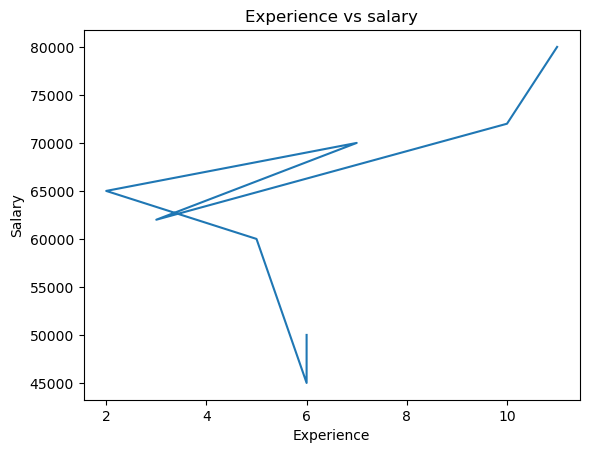

In [53]:
import matplotlib.pyplot as plt
plt.plot(df['experience'], df['salary($)'])
plt.title('Experience vs salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

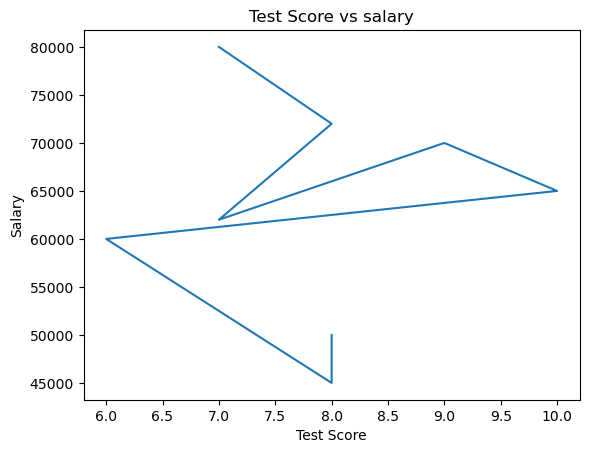

In [54]:
plt.plot(df['test_score(out of 10)'], df['salary($)'])
plt.title('Test Score vs salary')
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.show()

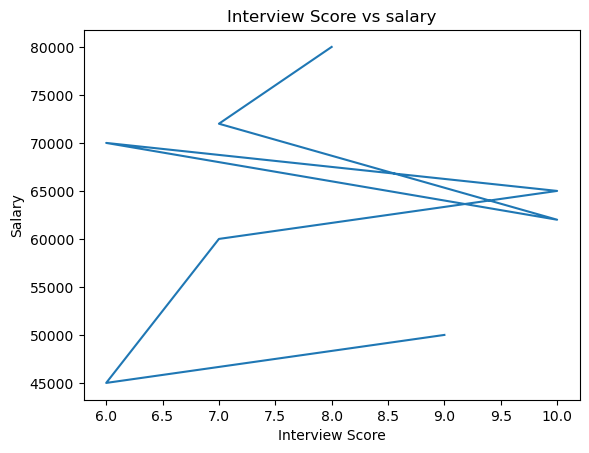

In [55]:
plt.plot(df['interview_score(out of 10)'], df['salary($)'])
plt.title('Interview Score vs salary')
plt.xlabel('Interview Score')
plt.ylabel('Salary')
plt.show()

### Since there is not any linear relationship among any of the features with salary we cannot expect good result combined otherwise. Hence we should be ready to face the worst accuracy. This notebook is just for learning purpose so we should not get carried away by seeing accuracy

In [56]:
x = df.drop('salary($)', axis = 1)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,6.0,8.0,9
1,6.0,8.0,6
2,5.0,6.0,7
3,2.0,10.0,10
4,7.0,9.0,6
5,3.0,7.0,10
6,10.0,8.0,7
7,11.0,7.0,8


In [57]:
y = df['salary($)']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [60]:
x_test

,experience,test_score(out of 10),interview_score(out of 10)
1,6.0,8.0,6
5,3.0,7.0,10


In [61]:
y_test

1    45000
5    62000
Name: salary($), dtype: int64

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [63]:
model.fit(x_train, y_train)

LinearRegression()

In [64]:
model.predict([[6,8,6]])

C:\Users\kisha\anaconda3\envs\kishan\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65792.47456326])

In [65]:
model.predict([[3,7,10]])

C:\Users\kisha\anaconda3\envs\kishan\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53239.20138222])

In [66]:
model.score(x_test, y_test)

-2.523035231037266

### Do not worry about accuracy , because in this case dataset was not consistent